# Spaceship Titanic - Training

## Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


## Importação dos dados

In [2]:
spaceship = pd.read_csv('Datasets/spaceship_titanic_train.csv')
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Funções

In [3]:
def acuracia_modelo(algoritmo):
    
    modelo = algoritmo()
    modelo.fit(train_x,train_y)
    previsoes = modelo.predict(test_x)

    acuracia = accuracy_score(test_y, previsoes).round(3) * 100
    return acuracia

def tabela_freq(df,variavel):
    
    df_freq = df.loc[:,[variavel]].value_counts().to_frame('freq').reset_index()
    df_percent = (df.loc[:,[variavel]].value_counts(normalize=True).to_frame('percent').round(3)*100).reset_index()
    df_freq_percent = pd.merge(df_freq,df_percent)
    return df_freq_percent

# Análise exploratória

In [4]:
spaceship_analise = spaceship.copy()

In [5]:
spaceship_analise.shape

(8693, 14)

In [6]:
# Verificar duplicatadas
spaceship_analise.duplicated().sum()

0

In [7]:
# Verificar valores nulos
spaceship_analise.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
spaceship_analise.fillna(0,inplace=True)

In [9]:
# Percentual de sim e não no conjunto de dados
tabela_freq(spaceship_analise,'Transported')

,Transported,freq,percent
0,True,4378,50.4
1,False,4315,49.6


In [10]:
tabela_freq(spaceship_analise,'HomePlanet')

,HomePlanet,freq,percent
0,Earth,4602,52.9
1,Europa,2131,24.5
2,Mars,1759,20.2
3,0,201,2.3


In [11]:
tabela_freq(spaceship_analise,'CryoSleep')

,CryoSleep,freq,percent
0,False,5656,65.1
1,True,3037,34.9


In [12]:
tabela_freq(spaceship_analise,'Cabin')

,Cabin,freq,percent
0,0,199,2.3
1,G/734/S,8,0.1
2,D/176/S,7,0.1
3,F/1194/P,7,0.1
4,C/21/P,7,0.1
...,...,...,...
6556,F/1245/P,1,0.0
6557,F/1244/S,1,0.0
6558,F/1243/S,1,0.0
6559,F/1243/P,1,0.0


In [13]:
tabela_freq(spaceship_analise,'Cabin')

,Cabin,freq,percent
0,0,199,2.3
1,G/734/S,8,0.1
2,D/176/S,7,0.1
3,F/1194/P,7,0.1
4,C/21/P,7,0.1
...,...,...,...
6556,F/1245/P,1,0.0
6557,F/1244/S,1,0.0
6558,F/1243/S,1,0.0
6559,F/1243/P,1,0.0


In [14]:
tabela_freq(spaceship_analise,'Destination')

,Destination,freq,percent
0,TRAPPIST-1e,5915,68.0
1,55 Cancri e,1800,20.7
2,PSO J318.5-22,796,9.2
3,0,182,2.1


In [15]:
tabela_freq(spaceship_analise,'VIP')

,VIP,freq,percent
0,False,8494,97.7
1,True,199,2.3


In [16]:
tabela_freq(spaceship_analise,'Name')

,Name,freq,percent
0,0,200,2.3
1,Ankalik Nateansive,2,0.0
2,Gollux Reedall,2,0.0
3,Anton Woody,2,0.0
4,Asch Stradick,2,0.0
...,...,...,...
8469,Erie Woodwinez,1,0.0
8470,Erie Sextones,1,0.0
8471,Erie Rilley,1,0.0
8472,Erie Potters,1,0.0


In [17]:
variaveis_numericas = spaceship_analise[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
variaveis_numericas.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

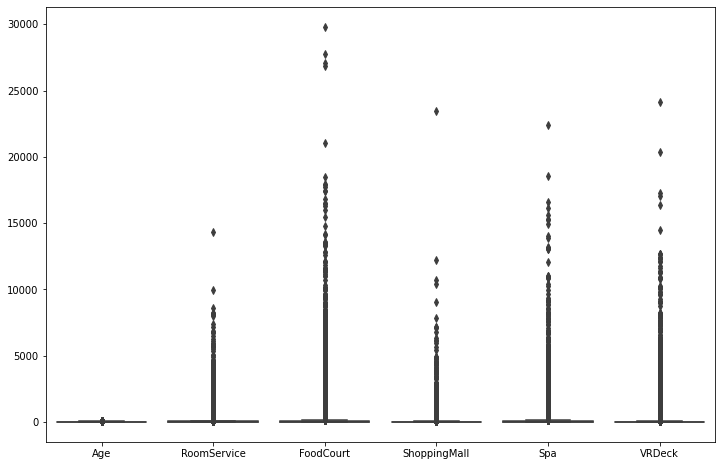

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=variaveis_numericas)

<AxesSubplot:>

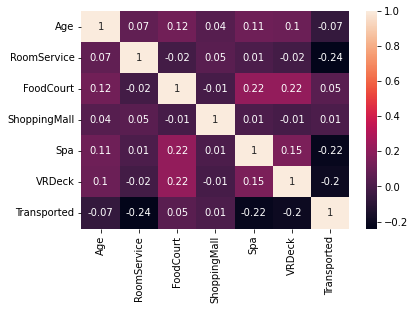

In [25]:
sns.heatmap(spaceship_analise.corr().round(2),annot=True)

# 1 - ML Aleatório - Teste

In [74]:
SEED = 135

In [75]:
spaceship_copia = spaceship.copy()
spaceship_copia.dropna(inplace=True)
spaceship_copia.shape

(6606, 14)

In [76]:
x = spaceship_copia.iloc[:,:-1]
y = spaceship_copia.iloc[:,-1]

In [77]:
df = pd.get_dummies(x, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name'])
df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size=0.25, random_state=SEED)
print(train_x.shape)
print(train_y.shape)

(4954, 11912)
(4954,)


In [124]:
comparacao_modelos = pd.DataFrame(
    {'modelos':
        ['DummyClassifier',
         'LinearSVC',
         'DecisionTreeClassifier',
         'RandomForestClassifier',
         'ExtraTreesClassifier',
         'BaggingClassifier'],
    'acuracia':
        [acuracia_modelo(DummyClassifier),
         acuracia_modelo(LinearSVC),
         acuracia_modelo(DecisionTreeClassifier),
         acuracia_modelo(RandomForestClassifier),
         acuracia_modelo(ExtraTreesClassifier),
         acuracia_modelo(BaggingClassifier)]}
    )
comparacao_modelos.sort_values(by='acuracia',ascending=False)

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,modelos,acuracia
0,DummyClassifier,50.4
1,LinearSVC,58.1
2,DecisionTreeClassifier,76.9
3,RandomForestClassifier,78.7
4,ExtraTreesClassifier,78.0
5,BaggingClassifier,78.8


# 2 - ML Aleatório - Preenchimento dos valores

In [31]:
SEED = 135

In [33]:
spaceship_2 = spaceship.copy()
spaceship_2 = spaceship_2.fillna(0)

x = spaceship_2.iloc[:,:-1]
y = spaceship_2.iloc[:,-1]

In [34]:
df = pd.get_dummies(x, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name'])
df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size=0.25, random_state=SEED)
print(train_x.shape)
print(train_y.shape)

(6519, 15054)
(6519,)


In [36]:
comparacao_modelos = pd.DataFrame(
    {'modelos':
        ['DummyClassifier',
         'LinearSVC',
         'DecisionTreeClassifier',
         'RandomForestClassifier',
         'ExtraTreesClassifier',
         'BaggingClassifier'],
    'acuracia':
        [acuracia_modelo(DummyClassifier),
         acuracia_modelo(LinearSVC),
         acuracia_modelo(DecisionTreeClassifier),
         acuracia_modelo(RandomForestClassifier),
         acuracia_modelo(ExtraTreesClassifier),
         acuracia_modelo(BaggingClassifier)]}
    )
comparacao_modelos.sort_values(by='acuracia',ascending=False)

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,modelos,acuracia
3,RandomForestClassifier,78.6
5,BaggingClassifier,77.4
4,ExtraTreesClassifier,75.6
2,DecisionTreeClassifier,74.9
1,LinearSVC,49.2
0,DummyClassifier,47.0


# 3 - ML Aleatório - Eliminando duplicatas
